In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 100
X = np.linspace(0, 2 * np.pi, num=n)
a = np.random.rand()
b = np.random.rand()
y = a * X + b + np.random.normal(0, 0.3, n)

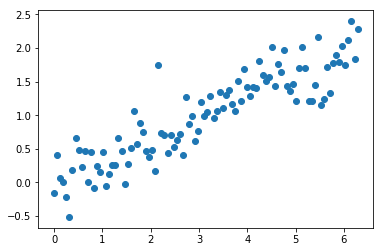

In [3]:
plt.scatter(X,y)

In [11]:
def k(x,x_):
    sigma = 1
    d = x-x_
    h = np.exp(-(d**2)/(2*sigma))
    return (x-x_)**2

In [12]:
X = X.reshape(-1,1)

In [13]:
K = k(X,X.T) # グラム行列を計算

In [14]:
la = 1e-6 # 　lambda
LI = np.eye(K.shape[0]) * la # lambdaと単位行列の積
inv = np.linalg.inv(K+LI) # 正則化項がついたグラム行列の逆行列

In [15]:
grid = np.linspace(0, 2 * np.pi, num=10000) #  numを大きくするとy=ax+b、近似関数を正確に描画できる
grid = grid.reshape(-1,1)
kn = k(X,grid.T)
kn.shape

(100, 10000)

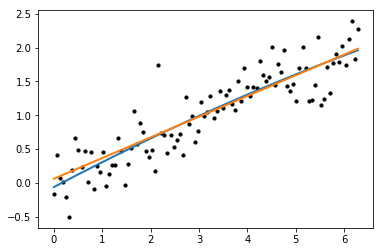

In [16]:
preds = kn.T.dot(inv).dot(y)

plt.scatter(X,y,s=10,c='black')
plt.plot(grid,preds,lw=2) # blue
plt.plot(grid,a*grid+b,lw=2) # red